# HW2: Model Inference of the Pretrained LeNet

<font color='red'>Name: 梁謙行 Student ID: 110061644 </font>

## 1. High-level Function Implementation for Each Layer
Implement a high-level functional model for each layer of the CNN, including convolution, pooling, and 
fully-connected layer with 8-bit quantization of the input activations, output activations, and weights accordingly.
* Learn how to use [Numba](https://numba.pydata.org/) to accelerate python functions
* Fill in the TODOs in `functional.py` of `nnutils`.
    * You must consider `psum_range = (lower_bound, upper_bound)` which controls the precision of partial sums.
    * `psum_record_list` will be used in *2. Bit-width of Partial Sums*, so you may leave it alone for now.
    
### 1.1 Pass all Unit Tests of OpTestCase in `nnunittest.py`.
First, use 32-bit signed integers for the partial sums to pass the unit tests. The accumulation of activations is limited to 32 bits in convolution and fully-connected layers. Clamp the value if it exceeds the minimum or maximum values of the 32-bit signed number.

Note that you should implement convolution layers, fully-connected layers, and max-pooling layers with "nested loops" by yourself. You are not allowed to use existing functions (e.g., `conv2d` in `numpy` or `pytorch`). Or you will not get any credits. Raise questions when in doubt.

There are eight unit tests you need to pass. If you intend to run part of them, follow the steps:
```
tests = ['test_C1', 'test_C3']
suite = unittest.TestSuite(map(nnunittest.OpTestCase, tests))
```

In [1]:
#!pip install numba==0.55.1

     |████████████████████████████████| 3.3 MB 8.6 MB/s 
     |████████████████████████████████| 34.5 MB 12 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [2]:
!unzip parameters.zip

Archive:  parameters.zip
  inflating: activations/img0/input.csv  
  inflating: activations/img0/output.csv  
  inflating: activations/img0/c1/input.csv  
  inflating: activations/img0/c1/output.csv  
  inflating: activations/img0/s2/input.csv  
  inflating: activations/img0/s2/output.csv  
  inflating: activations/img0/c3/input.csv  
  inflating: activations/img0/c3/output.csv  
  inflating: activations/img0/s4/input.csv  
  inflating: activations/img0/s4/output.csv  
  inflating: activations/img0/c5/input.csv  
  inflating: activations/img0/c5/output.csv  
  inflating: activations/img0/f6/input.csv  
  inflating: activations/img0/f6/output.csv  
  inflating: activations/img0/output/input.csv  
  inflating: activations/img0/output/output.csv  
  inflating: activations/img1/input.csv  
  inflating: activations/img1/output.csv  
  inflating: activations/img1/c1/input.csv  
  inflating: activations/img1/c1/output.csv  
  inflating: activations/img1/s2/input.csv  
  inflating: activations

In [1]:
import unittest
import nnunittest

suite = unittest.TestLoader().loadTestsFromTestCase(nnunittest.OpTestCase)
#suite = unittest.TestLoader().loadTestsFromTestCase(OpTestCase)
unittest.TextTestRunner(verbosity=2).run(suite)

test_C1 (nnunittest.OpTestCase) ... ok
test_C3 (nnunittest.OpTestCase) ... ok
test_C5 (nnunittest.OpTestCase) ... ok
test_F6 (nnunittest.OpTestCase) ... ok
test_OUTPUT (nnunittest.OpTestCase) ... ok
test_S2 (nnunittest.OpTestCase) ... ok
test_S4 (nnunittest.OpTestCase) ... ok
test_edges (nnunittest.OpTestCase) ... ok

----------------------------------------------------------------------
Ran 8 tests in 25.980s

OK


<unittest.runner.TextTestResult run=8 errors=0 failures=0>

### 1.2 Reconstruct the LeNet in HW1
* Fill in the TODO in `forward()` of `LeNet`.
* Test the model with the test dataset. There should be no accuracy degradation if you have done everything correctly.

In [2]:
from nnutils import LeNet
import nnutils.test as test
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [
     transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))
    ])

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

def run_LeNet(n_bit, max_samples = None):
    number_range = (-(2**(n_bit-1)), 2**(n_bit-1) - 1)
    print("bit:", n_bit)
    print("bit-width range:",number_range)

    psum_range = {
        'c1': number_range,
        'c3': number_range,
        'c5': number_range,
        'f6': number_range,
        'output': number_range
    }

    model = LeNet(psum_range)

    return test(model, testloader)

run_LeNet(n_bit = 32)

bit: 32
bit-width range: (-2147483648, 2147483647)
Accuracy: 98.13%


98.13

## 2. Bit-width of Partial Sums
### 2.1 Question: Find the minimum bit-width of partial sums for all layers with the highest accuracy
1. Use matplotlib to plot "Test Accuracy(%)" versus "Bit-width of Partial Sums" for "Bit-width of Partial Sums" in $[2, 32]$ by `matplotlib.pyplot.plot()`.
    * [Plot with matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).
2. What is the smallest bit-width of partial sums that maintains the same accuracy from the previous plot?

### 2.1 Answers
<font color='red'>Write your answers here.</font>
1. 如下方程式執行完後輸出的圖
2. 18-bits 是最少且可以維持在跟 32-bits 一樣高 Accuracy(98.13%) 的bit數。

bit: 2
bit-width range: (-2, 1)
Accuracy: 9.8%
bit: 4
bit-width range: (-8, 7)
Accuracy: 9.8%
bit: 6
bit-width range: (-32, 31)
Accuracy: 9.8%
bit: 8
bit-width range: (-128, 127)
Accuracy: 9.8%
bit: 10
bit-width range: (-512, 511)
Accuracy: 9.8%
bit: 12
bit-width range: (-2048, 2047)
Accuracy: 9.8%
bit: 14
bit-width range: (-8192, 8191)
Accuracy: 13.139999999999999%
bit: 16
bit-width range: (-32768, 32767)
Accuracy: 95.25%
bit: 18
bit-width range: (-131072, 131071)
Accuracy: 98.13%
bit: 20
bit-width range: (-524288, 524287)
Accuracy: 98.13%
bit: 22
bit-width range: (-2097152, 2097151)
Accuracy: 98.13%
bit: 24
bit-width range: (-8388608, 8388607)
Accuracy: 98.13%
bit: 26
bit-width range: (-33554432, 33554431)
Accuracy: 98.13%
bit: 28
bit-width range: (-134217728, 134217727)
Accuracy: 98.13%
bit: 30
bit-width range: (-536870912, 536870911)
Accuracy: 98.13%
bit: 32
bit-width range: (-2147483648, 2147483647)
Accuracy: 98.13%


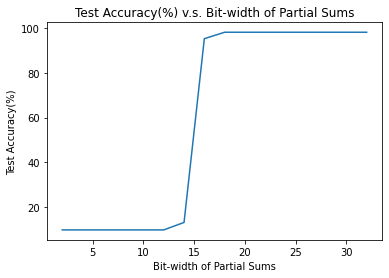

In [3]:
import matplotlib.pyplot as plt
acc = []
for i in range(1, 17):
    acc.append(run_LeNet(i*2))

# TODO
plt.xlabel("Bit-width of Partial Sums")
plt.ylabel("Test Accuracy(%)")
plt.title("Test Accuracy(%) v.s. Bit-width of Partial Sums")
plt.plot(range(2,34,2),acc)
plt.show()


### 2.2 Question: Find the minimum bit-width of partial sums for each layer with the highest accuracy
1. Plot the distribution of partial sums of each quantized layer in the CNN with the MNIST test dataset. Write down the min, max, and standard deviation for each layer. 
    * Check the TODO in `LeNet` of `LeNetModel`. You should save all partial sums to the dictionary, `psum_record_dict`.
    * We can get this dictionary after running the model with the first image in the test dataset by `model.psum_record_dict`.
2. Determine the minimum bit-width of partial sums in each layer without hurting the accuracy. 
    * Fill in the TODO to see if the accuracy is still the same.
    * Show the accuracy after doing so.

### 2.2 Answers
<font color='red'>Write your answers here.</font>
1. Layer: c1
   
       max: 90890
       min: -87663
       standard-deviation: 20342.48140778911

   Layer: c3
       max: 45015
       min: -103454
       standard-deviation: 15670.133818757799

   Layer: c5
       max: 56490
       min: -88113
       standard-deviation: 18553.87846727538

   Layer: f6
       max: 35653
       min: -49392
       standard-deviation: 11948.112733686756

   Layer: output
       max: 7338
       min: -36733
       standard-deviation: 8776.06021218824

2. TODO 程式碼如下。最後算出來的結果，每一層的 partial sum 需要至少18bits 來維持一樣的Accuracy，結果會在下方code執行完時印出來。Accuracy一樣是98.13%。

bit: 32
bit-width range: (-2147483648, 2147483647)


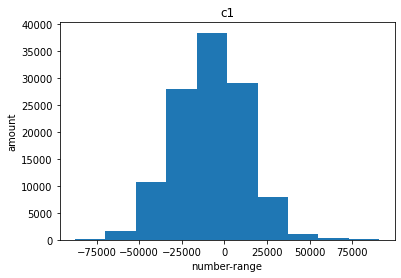

Layer: c1
max: 90890
min: -87663
standard-deviation: 20342.48140778911




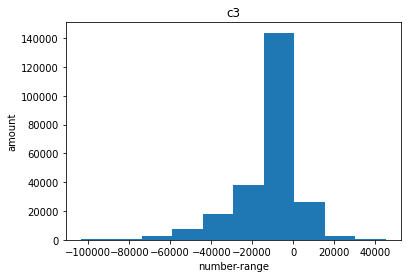

Layer: c3
max: 45015
min: -103454
standard-deviation: 15670.133818757799




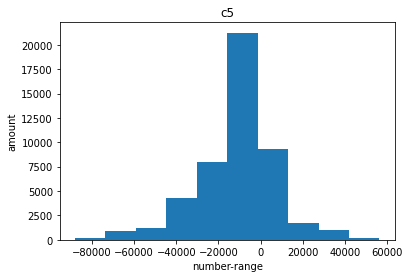

Layer: c5
max: 56490
min: -88113
standard-deviation: 18553.87846727538




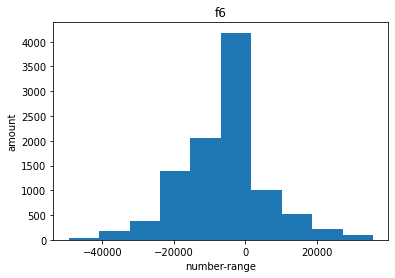

Layer: f6
max: 35653
min: -49392
standard-deviation: 11948.112733686756




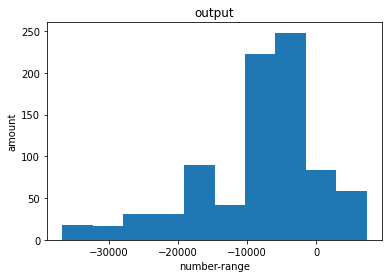

Layer: output
max: 7338
min: -36733
standard-deviation: 8776.06021218824




In [11]:
import numpy as np
import matplotlib.pyplot as plt
n_bit = 32
number_range = (-(2**(n_bit-1)), 2**(n_bit-1) - 1)
print("bit:", n_bit)
print("bit-width range:",number_range)

psum_range = {
    'c1': number_range,
    'c3': number_range,
    'c5': number_range,
    'f6': number_range,
    'output': number_range
}

model = LeNet(psum_range)

image = np.expand_dims(testset[0][0], axis=0)
_ = model.forward(image, psum_record = True)

# TODO
# Plot the distribution of partial sums of each quantized layer in the CNN
for i in model.psum_record_dict:
    plt.hist(model.psum_record_dict[i])
    plt.ylabel("amount")
    plt.xlabel("number-range")
    plt.title(i)
    plt.show()
    print("Layer:", i)
    print("max:",max(model.psum_record_dict[i]))
    print("min:",min(model.psum_record_dict[i]))
    print("standard-deviation:",np.std(model.psum_record_dict[i]))
    print("\n")


In [10]:
# TODO
# Test your model with those Bit-widths you choose

n_bit_each_layer = {}

psum_range = {}

for key in model.psum_record_dict:
    for i in range(2,34,2):
        n_bit = i
        number_range = (-(2**(n_bit-1)), 2**(n_bit-1) - 1)
        if (max(model.psum_record_dict[key]) > number_range[1]) or (min(model.psum_record_dict[key]) < number_range[0]):
            continue
        else:
            n_bit_each_layer[key] = n_bit
            psum_range[key] = number_range
            print("Layer:", key)
            print("bit:", n_bit)
            print("bit-width range:",number_range)
            break

model = LeNet(psum_range)

_ = test(model, testloader)

Layer: c1
bit: 18
bit-width range: (-131072, 131071)
Layer: c3
bit: 18
bit-width range: (-131072, 131071)
Layer: c5
bit: 18
bit-width range: (-131072, 131071)
Layer: f6
bit: 18
bit-width range: (-131072, 131071)
Layer: output
bit: 18
bit-width range: (-131072, 131071)
Accuracy: 98.13%


## 3. Evaluation: Energy Model
### 3.1 Question: Evaluate these two approaches based on the following energy model:
$$E_w = s_{mul}\times N_{mul} + s_{add}\times N_{add}$$
$$s_{mul} = 64\times \left(\frac{B_{mul}}{8}\right)^2, s_{add} = B_{add}$$
where $N_{mul}$ and $N_{add}$ are the number of multiplications and additions, respectively. $B_{mul}$ and $B_{add}$ are the bit-widths of multiplier and adder, respectively. $s_{mul}$ denotes the power scaling factor of multiplication; $s_{add}$ denotes the power scaling factor of addition.
* You must accumulate the energy layer by layer to obtain the overall $E_w$, if each layer has a  different $B_{mul}$ or $B_{add}$.
* We only consider convolution and fully-connected operations, ignoring pooling and ReLU operations in this energy model.
* Disclaimer: Note that this energy model is artificial and oversimplified. DO NOT apply it to your research work.

1. Calculate the overall $E_w$ for the setup of 2.1.
2. Calculate the energy layer by layer and also the overall $E_w$ for the setup of 2.2.

### 3.1 Answers
<font color='red'>Write your answers here.</font>

layer c1 : 

    mul 28 * 28 * 6 * 25 = 117600
    add 28 * 28 * 6 * 25 = 117600

layer c3 :

    mul 10 * 10 * 6 * 25 * 16 = 240000
    add 10 * 10 * 6 * 25 * 16 = 240000

layer c5 :

    mul 120 * 25 * 16 = 48000
    add 120 * 25 * 16 = 48000

layer f6 :

    mul 120 * 84 = 10080
    add 120 * 84 = 10080

layer out :

    mul 84 * 10 = 840
    add 84 * 10 + 10 = 850

$N_{mul} = 117600+240000+48000+10080+840 = 416,520$

$N_{add} = 117600+240000+48000+10080+850 = 416,530$


1. $s_{mul} = 64\times \left(\frac{32}{8}\right)^2 = 1024$
   
   $s_{add} = 32$

   $E_w = s_{mul}\times N_{mul} + s_{add}\times N_{add} = 1024 * 416520 + 32 * 416530 = 439,845,440$


2. $s_{mul} = 64\times \left(\frac{18}{8}\right)^2 = 324$
   
   $s_{add} = 18$

   $E_w = s_{mul}\times N_{mul} + s_{add}\times N_{add} = 324 * 416520 + 18 * 416530 = 142,450,020$
   

